<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Introducción a OpenCV</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Contenido</span>

## <span style="color:blue">Prólogo</span>

OpenCV es la base y espina de los proyectos de visión artificial, por sus capacidades básicas de entrada y salida(I/O), hasta sus funciones complejas de transformaciones, procesamiento y deployment. Se comenzará el estudio de este paquete con la creación, lectura y procesamiento de imágenes

## <span style="color:blue">Lectura/Escritura de archivos de imagen</span>

OpenCV tiene dos funciones esenciales cuando se trabajan con imagenes fijas, y una que es buena de tener:

- `imread` para cargar una imagen desde un archivo
- `imwrite` para escribir una imagen a un archivo especificado
- `imshow` para mostrar la imágen en un cuadro

Aunque vamos a usar, principalmente OpenCV, es posible crear una imagen usando numPy

In [1]:
import numpy as np
import cv2

img = np.zeros((3,3), dtype = np.uint8)

print(img)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


Acabamos de crear un cuadro negro de 3x3 pixeles. Lo importante es el argumento "dtype", el cual definimos como números enteros de 8 bits. Significa que tienen un rango de 0 a 255. 0 es negro y 255 es blanco, con el resto siendo rangos de gris. Cambiemos esto un poco

In [2]:
img2 = np.full((3, 3), 255, dtype = np.uint8) # cuadro 3x3 de color blanco
img3 = np.random.randint(0,255, (10,10),dtype = np.uint8) # cuadro 3x3 de colores aleatorios
print(img2)
print(img3)

[[255 255 255]
 [255 255 255]
 [255 255 255]]
[[198  67 223  85 252 164 102 206 215 170]
 [207 242  79 232  36 179 210  30  80 211]
 [ 36  23 232 139 191  89  49  17 197  94]
 [149 180 223 147  81 139 246  84  89 190]
 [ 82 196 113  61  34  36   9   6 106  19]
 [212 216 171  92  30 123  56  85 171 205]
 [  3 110 193  39 100 118  30  83 140 204]
 [248 185 192  96 137 243  86  16 219 237]
 [207 154 148 248  94  53 204  36 223  16]
 [ 21  60  13 192 147  52 215 124 205 184]]


En este momento solo tenemos la idea "empirica" del color a partir de los números. Vamos a ver los números como colores 

In [3]:
cv2.imshow('black box',img) # pedimos que se abra una ventana con la imagen negra
cv2.imshow('white box',img2) # pedimos que se abra una ventana con la imagen blanca
cv2.imshow('random box',img3) # pedimos que se abra una ventana con la imagen aleatoria
cv2.waitKey(0) #le decimos que espere a continuar la interpretación del código hasta que se use una tecla
cv2.destroyAllWindows() # se cierran todas las ventanas creadas

Podemos también utilizar matplotlib para mostrar las imágenes como si fuera un gráfico

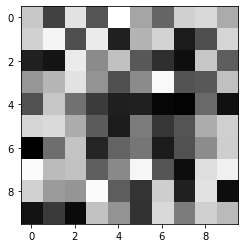

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img3, cmap="gray")
plt.show()


Vamos ahora a pasar una imagen de escala de grises a color en la escala BGR y veamos cómo cambia(CUIDADO, DIFERENTE A RGB)

In [7]:
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

img2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [8]:
cv2.imshow('white box BGR',img2) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

Como vemos, ahora la imagen no está compuesta de una matríz 3x3, pero 3 matrices 3x3. LA primera matriz representa los tonos de azul, la segunda de verde, y la tercera de rojo

Podemos ver la estructura de las imágenes usando la función `shape`

In [9]:
print(img3.shape)
print(img2.shape)

(10, 10)
(3, 3, 3)


guardemos la última imagen en formato `.png`. Si no se define un directorio en específico, las imagenes se guardarán en el directorio de trabajo

In [10]:
cv2.imwrite("../Imagenes/random_box.png", img3)

True

con esta función podemos también guardar imagenes con otro formato

In [11]:
image = cv2.imread('../Imagenes/logo-final-ap.png')
cv2.imwrite('../Imagenes/logo-final-ap.jpg', image)

True

cuando leemos una imagen usando `imread`, por default va a leer las imagenes y transformarlas en formato BGR(Recuerden, diferente a RGB), pero podemos ciertos cambios si eso no es lo que queremos

- `cv2.IMREAD_BGR` es la opción por default, la imagen se carga con los 3 canales BGR
- `cv2.IMREAD_GRAYSCALE` cuando solo se quiere el canal de grises
- `cv2.IMREAD_ANYCOLOR` Si quieren que el computador detecte el tipo de escala, de acuerdo a la metadata de las imagenes

Volvamos a cargar el logo de "Aprendizaje profundo", esta vez en escala de grises, veámosla y luego guardémosla

In [12]:
grayImage = cv2.imread('../Imagenes/logo-final-ap.png', cv2.IMREAD_GRAYSCALE)

cv2.imshow('GRAY IMAGE',grayImage)
cv2.waitKey(0) 
cv2.destroyAllWindows()

cv2.imwrite('../Imagenes/logo-final-ap-gris.png', grayImage)

True

## <span style="color:blue">Datos de imagen con numpy</span>

Ya vimos que las imágenes en python pueden ser representadas numericamente como arrays en numpy, y por tanto pueden ser afectadas o "manipuladas" de la misma forma que se le haría a un array común y corriente. 

Vamos poco a poco con las manipulaciuones de datos. Comencemos cambiando un pixel de color, usemos el cuadro blanco que creamos al inicio

In [19]:
img2[0, 1] = [0,255,0]
cv2.imshow('CHANGED IMAGE',img2)
cv2.waitKey(0) 
cv2.destroyAllWindows()

Se cambió el pixel de la posición 0,0 de negro a blanco. Esta es una forma decente de hacerlo, pero hay una forma mejor, y tal vez más rápida de hacer cambios en canales específicos


vamos ahora a hacer un cambio de color en el Canal "Azul". Podemos hacer esto con dos métodos de numpy:

- `item` tiene tres parametros, $(x,y)$ son la posición en la matriz, y el indice de en cuál canal vamos a revisar. Imprime el número en el punto que se da
- `itemset` tiene una tupla de dos parametros. el primer elemento son los parametros de `item` y el segundo es el nuevo valor que queremos asignarle.

In [20]:
img2.itemset((0,0,0), 255)
cv2.imshow('CHANGED IMAGE',img2)
cv2.waitKey(0) 
cv2.destroyAllWindows()

Esta operación es buena para casos de rangos pequeños, Si se quieren hacer cambios más grandes es mejor usar las funciones de OpenCV(Que veremos luego) o usar slicing en numpy.

Cambiemos, por ejemplo, el canal verde del logo de Aprendizaje profundo a 0

In [21]:
image[:, :, 1] = 0

cv2.imshow('CHANGED IMAGE',image)
cv2.waitKey(0) 
cv2.destroyAllWindows()

## <span style="color:blue">Lectura y escritura de archivos de video</span>

La mayoría, si no todo, lo que hemos visto sobre procesamiento de imagenes tiene un equivalente para el procesamiento de video.

- `VideoCapture` para la lectura de los archivos de video
- `VideoWriter` Para la creación de archivos de video

En la lectura lo que hace es tomar cada fotograma y tratarlas como una imagen en formato BGR(De nuevo, NO ES RGB). En la escritura, se irán procesando los fotogramas en orden y se reconstruyen en otro formato

Tomemos un video de ejemplo, y hagamos una copia 

In [9]:
videoCapture = cv2.VideoCapture('../Imagenes/MyInputVid.avi') # se da el directorio para la lectura de video

fps = videoCapture.get(cv2.CAP_PROP_FPS) #obtenemos los fotogramas por segundo del video original
size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT))) #tomamos las dimensiones del video original

videoWriter = cv2.VideoWriter(
    '../Imagenes/MyOutputVid.avi', cv2.VideoWriter_fourcc('I', '4', '2', '0'), #creamos un "escritor de video", le damos la dirección del archivo nuevo, el codificador de video
    fps, size) #, los fotogramas por segundo y el tamaño que se quiere

success, frame = videoCapture.read() #se comienza a leer cada fotograma
while success: #hacemos un loop para cada fotograma del video
    videoWriter.write(frame) #escribimos el nuevo footograma del nuevo video
    success, frame = videoCapture.read() #continuamos el loop

## <span style="color:blue">Trabajando con la camara web</span>

Es posible "grabar" videos con opencv usando nuestra propia cámara web de la misma forma que acabamos de hacer. Solo que, en lugar de darle al capturador la dirección a un video, le damos el índice de la cámara. Vamos a grabar 10 segundos de video con nuestra cámara web y lo guardamos en un archivo AVI

In [22]:
import cv2

videoCapture = cv2.VideoCapture(0) # se da el indice de la cámara web 

fps = 30 #se supone esta rata ya que es un estándar de mercado
size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT))) #tomamos las dimensiones de la cámara web

videoWriter = cv2.VideoWriter(
    '/home/thejarmanitor/Videos/MyTestVideo.avi', cv2.VideoWriter_fourcc('I', '4', '2', '0'),
    fps, size)

success, frame = videoCapture.read() 
framesRemaining = 10 * fps - 1 #definimos el límite a 10 segundos
while success and framesRemaining > 0: 
    videoWriter.write(frame) 
    success, frame = videoCapture.read() 
    framesRemaining -= 1

[ WARN:0@1682.226] global /io/opencv/modules/videoio/src/cap_v4l.cpp (889) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1682.251] global /io/opencv/modules/videoio/src/cap.cpp (595) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.5.5) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /home/thejarmanitor/Videos/MyTestVideo.avi in function 'icvExtractPattern'




El código si nos grabó, pero no pudimos ver lo que estaba viendo la cámara hasta que ya se hizo el proceso. Igual como hicimos con las imagenes, podemos abrir ventanas que 
muestren video

crearemos una ventana que muestre la cámara web, y que se cierre cuando le hagamos click o usemos una tecla

In [24]:
import cv2

clicked = False #booleana para ver si se usó el mouse
def onMouse(event, x, y, flags, param): #función para detectar el click del botón izquierdo
    global clicked 
    if event == cv2.EVENT_LBUTTONUP: #se revisa si se hizo un click
        clicked = True #se cambia la booleana
cameraCapture = cv2.VideoCapture(0) #tomamos el indice de la cámara
cv2.namedWindow('MyWindow') #le damos un nombre a la ventana
cv2.setMouseCallback('MyWindow', onMouse) # usamos la función que creamos para que la ventana reconozca el acto
print('Mostrando cámara. Por favor haga click en la ventana o use una tecla para acabar el proceso')
success, frame = cameraCapture.read()
while success and cv2.waitKey(1) == -1 and not clicked: #se mostrará video mientras 
    cv2.imshow('MyWindow', frame)
    success, frame = cameraCapture.read()
    
cv2.destroyWindow('MyWindow')
cameraCapture.release()

Mostrando cámara. Por favor haga click en la ventana o use una tecla para acabar el proceso
